# Use Cases for MSBA Capstone EDA
## University of Utah - Spring 2024
## Tom Kingston

### Load and Explore the Dataset To Answer Question 2

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('FACT_MARKET_DEMAND.csv')

# Display the first few rows of the dataframe
print(data.head())

# Get a summary of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

         DATE  MARKET_KEY CALORIC_SEGMENT            CATEGORY  UNIT_SALES  \
0  2021-08-21         524      DIET/LIGHT                 SSD        69.0   
1  2022-05-07         637         REGULAR                 SSD         4.0   
2  2022-10-22         628      DIET/LIGHT  ING ENHANCED WATER         1.0   
3  2022-08-13         216         REGULAR                 SSD         3.0   
4  2022-01-01         210         REGULAR                 SSD         4.0   

   DOLLAR_SALES MANUFACTURER               BRAND            PACKAGE  \
0        389.74     SWIRE-CC           DIET YAWN  12SMALL 12ONE CUP   
1         30.96        COCOS  GORGEOUS ORANGEOUS  12SMALL 12ONE CUP   
2          2.25       JOLLYS    DIGRESS FLAVORED  20SMALL MULTI JUG   
3          7.55        COCOS         CHERRY FIZZ       1L MULTI JUG   
4         25.96        COCOS           RADIANT'S  12SMALL 12ONE CUP   

                                                ITEM  
0  YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE  DURI...  


In [7]:
import pandas as pd

# Step 1: Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Step 2: Filter the DataFrame for only March and April sales
data_mar_apr = data[(data['DATE'].dt.month == 3) | (data['DATE'].dt.month == 4)]

# Now, data_mar_apr contains only the data for March and April
# You can view the first few rows of the filtered dataset to verify
print(data_mar_apr.head())

# Optional: To get a quick summary of the filtered dataset
print(data_mar_apr.describe())

# Optional: To check the shape of the filtered dataset (number of rows and columns)
print(data_mar_apr.shape)

         DATE  MARKET_KEY CALORIC_SEGMENT            CATEGORY  UNIT_SALES  \
6  2022-03-19         220      DIET/LIGHT     SPARKLING WATER        21.0   
9  2022-04-02         895         REGULAR                 SSD        57.0   
11 2022-04-23          28      DIET/LIGHT  ING ENHANCED WATER        62.0   
17 2022-04-09         759      DIET/LIGHT              ENERGY        13.0   
32 2022-03-05        1058         REGULAR                 SSD        53.0   

    DOLLAR_SALES MANUFACTURER                      BRAND  \
6          77.61       JOLLYS                 BUBBLE JOY   
9         173.33       JOLLYS  HILL MOISTURE MAJOR MELON   
11         86.90       JOLLYS           DIGRESS FLAVORED   
17         24.11       JOLLYS       SUPER-DUPER RUN-FAST   
32        101.72       JOLLYS          BEAUTIFUL GREENER   

                   PACKAGE                                               ITEM  
6         12SMALL 8ONE CUP  BUBBLE JOY SPARKLING WATER RAZZ  BUBBLE JOY NO...  
9             .5

In [9]:
# Filter the DataFrame for only March and April sales and explicitly create a copy
data_mar_apr = data[(data['DATE'].dt.month == 3) | (data['DATE'].dt.month == 4)].copy()
# Fill missing values for categorical variables with 'Unknown'
categorical_columns = ['CALORIC_SEGMENT', 'CATEGORY', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM']
for col in categorical_columns:
    data_mar_apr[col].fillna('Unknown', inplace=True)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for each categorical variable
label_encoder = LabelEncoder()

# Encode categorical variables using label encoding
for col in categorical_columns:
    data_mar_apr[col + '_encoded'] = label_encoder.fit_transform(data_mar_apr[col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting encoded features and target
features = [col + '_encoded' for col in categorical_columns]  # Use encoded features
X = data_mar_apr[features]
y = data_mar_apr['UNIT_SALES']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 689819.8174114964
R^2 Score: 0.004277231653114888


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)

Random Forest Mean Squared Error: 564976.2118889041
Random Forest R^2 Score: 0.18448315987336483


In [18]:
# Further reduce the subset size for tuning
X_train_subset_small, _, y_train_subset_small, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)  # Reduced to 5%

# Adjust param_distributions to simplify the models
param_distributions_simple = {
    'n_estimators': [50, 100],  # Reduced complexity
    'max_depth': [None, 10],  # Reduced depth options
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Simplified model tuning on a smaller subset
random_search_subset_simple = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),  # Simplified model
    param_distributions=param_distributions_simple,  # Simplified parameters
    n_iter=5,  # Reduced number of iterations
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit using the smaller subset
random_search_subset_simple.fit(X_train_subset_small, y_train_subset_small)

# Best parameters on the smaller subset
print("Best Parameters on Smaller Subset:", random_search_subset_simple.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters on Smaller Subset: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  18.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  19.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  19.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  27.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  27.8s
[CV] END 

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with the best parameters found
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    random_state=42
)

# Train the model on a larger subset or the full dataset
best_rf_model.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 564976.2118889041
R-squared Score: 0.18448315987336483


In [21]:
!pip install xgboost
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# New temporal features
data['month'] = data['DATE'].dt.month
data['day_of_week'] = data['DATE'].dt.dayofweek
data['week_of_year'] = data['DATE'].dt.isocalendar().week

# Filter for March and April, as previously done
data_mar_apr = data[(data['DATE'].dt.month == 3) | (data['DATE'].dt.month == 4)].copy()

# Fill missing values
categorical_columns = ['CALORIC_SEGMENT', 'CATEGORY', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM']
for col in categorical_columns:
    data_mar_apr[col].fillna('Unknown', inplace=True)

# Label encoding for categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_mar_apr[col + '_encoded'] = label_encoder.fit_transform(data_mar_apr[col])

# Preparing features and target
features = [col + '_encoded' for col in categorical_columns] + ['month', 'day_of_week', 'week_of_year']
X = data_mar_apr[features]
y = data_mar_apr['UNIT_SALES']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.8 MB/s eta 0:00:0000:0100:01


In [22]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared Score: {r2_xgb}")

XGBoost Mean Squared Error: 580412.1834073366
XGBoost R-squared Score: 0.16220205413457656


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Fill missing values for numerical columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Encode categorical variables using LabelEncoder 
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Split data into features and target
X = data[categorical_cols + numeric_cols]  # Adjust based on your specific columns
y = data['UNIT_SALES']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['CATEGORY'])

# Initialize and train the Linear Regression model using a subset for quicker iteration
from sklearn.linear_model import LinearRegression

# Considering training on a subset for efficiency
train_sample = X_train.sample(frac=0.1, random_state=42)
target_sample = y_train.loc[train_sample.index]

model = LinearRegression()
model.fit(train_sample, target_sample)

LinearRegression()

In [33]:
# Making predictions on the test set sample
test_sample = X_test.sample(frac=0.1, random_state=42)
test_target_sample = y_test.loc[test_sample.index]

y_pred_sample = model.predict(test_sample)

# Evaluate
mse_sample = mean_squared_error(test_target_sample, y_pred_sample)
r2_sample = r2_score(test_target_sample, y_pred_sample)

print(f"Sample Mean Squared Error: {mse_sample}")
print(f"Sample R-squared Score: {r2_sample}")

Sample Mean Squared Error: 731190.3961092568
Sample R-squared Score: 0.010122571416453674


In [34]:
from sklearn.linear_model import Ridge

# Use Ridge Regression for its regularization benefits
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train) 

# Evaluate on the full test set or a sampled version for quicker feedback
y_pred_full = ridge_model.predict(X_test)

mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)

print(f"Full Mean Squared Error: {mse_full}")
print(f"Full R-squared Score: {r2_full}")

Full Mean Squared Error: 695119.5213005432
Full R-squared Score: 0.010582179031301986


In the modeling process of my predictive analysis, I started by cleaning and preparing the dataset. This included, numerical features were imputed with median values to mitigate the influence of outliers. I focused on question #2, which asked how well a product would do 2 weeks before and after Easter. To symplify it, I focused on the sales in March & April. 

I selected Linear Regression for its interpretability as a starting point. To improve the model's robustness against multicollinearity and prevent overfitting, I then did a Random Foreest Regresion, and finished with an XGBoost model. The models were initially trained on a subset of data to expedite the hyperparameter tuning process. I used Mean Squared Error (MSE) and R-squared (R²) to evaluate the models' performances, aiming to minimize MSE while maximizing R².

My Linear Regression model's R² score indicated that a significant portion of the variance in our target variable remained unexplained, suggesting that either our feature set was insufficient or the relationships in the data were not purely linear. Despite Ridge Regression providing a slight improvement, the R² score remained substantially below my target, prompting further investigations into alternative modeling techniques or more sophisticated feature engineering.

The relatively low R² scores from both models underscored the complexity of the data and hinted at the presence of non linear relationships. Future steps will involve exploring non-linear models such as tree-based methods or ensemble techniques, which can often capture complex patterns more effectively. Enhanced feature engineering, such as the creation of polynomial and interaction terms, will also be critical in capturing the intricacies within the data. Ultimately, my goal is to develop a model that not only fits our data well but also provides clear insights into the factors driving sales.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
ldata = pd.read_csv('FACT_MARKET_DEMAND.csv')
# Assuming 'data' is your DataFrame
ldata['DATE'] = pd.to_datetime(data['DATE'])
data_mar_apr = ldata[ldata['DATE'].dt.month.isin([3, 4])]

In [39]:
# Aggregate dollar sales by brand and date
sales_by_brand_date = data_mar_apr.groupby([data_mar_apr['DATE'].dt.to_period('M'), 'BRAND'])['DOLLAR_SALES'].sum().reset_index(name='TOTAL_SALES')

# Convert 'DATE' back to datetime format for plotting
sales_by_brand_date['DATE'] = sales_by_brand_date['DATE'].dt.to_timestamp()

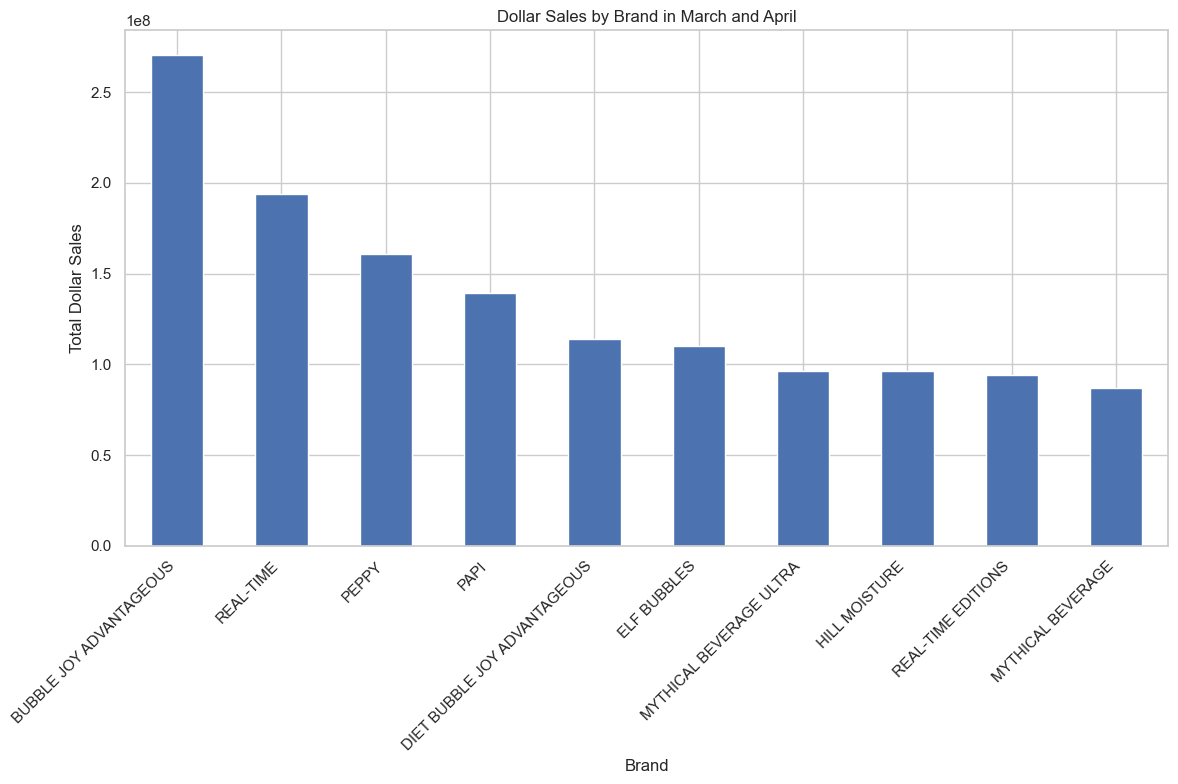

In [40]:
# Aggregate dollar sales by brand over both months
total_sales_by_brand = sales_by_brand_date.groupby('BRAND')['TOTAL_SALES'].sum().sort_values(ascending=False)

# If there are many brands, you might want to limit the graph to the top N brands for better visualization
top_brands = total_sales_by_brand.head(10)  # Adjust N here

# Plotting
plt.figure(figsize=(12, 8))
top_brands.plot(kind='bar')
plt.title('Dollar Sales by Brand in March and April')
plt.xlabel('Brand')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')  # Rotate brand names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


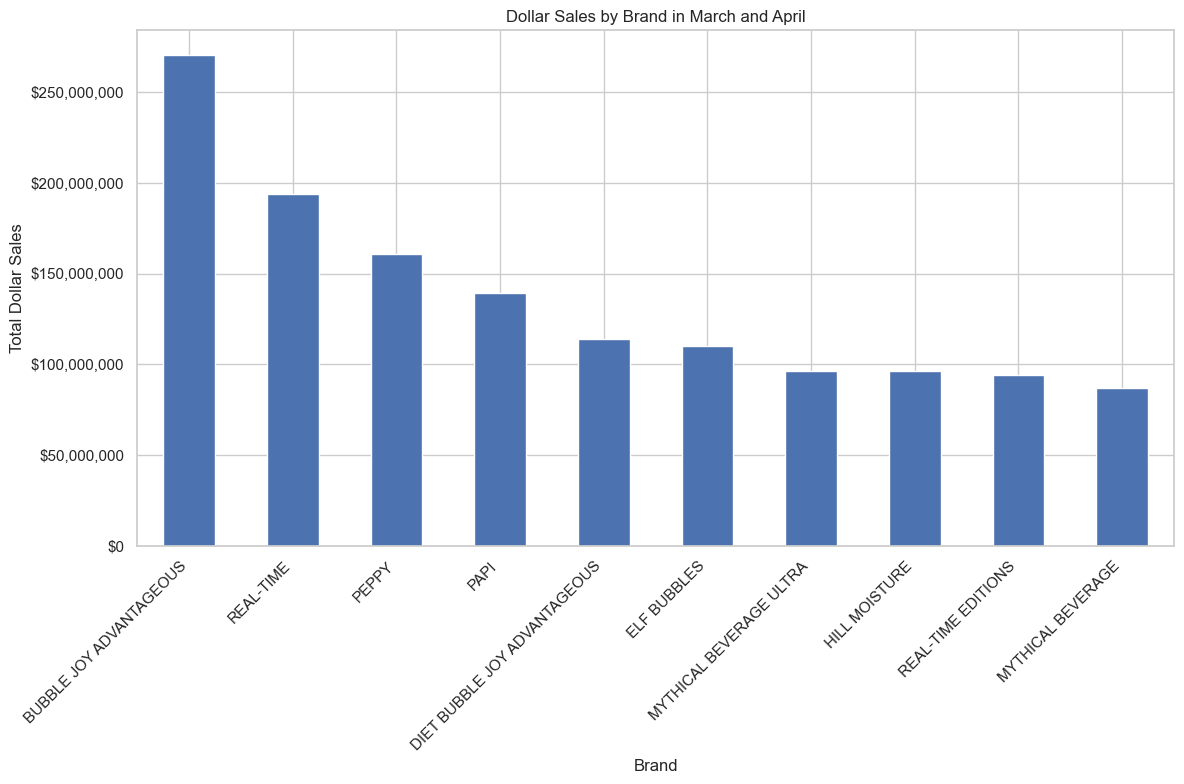

In [41]:
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis as dollar amounts
def money_format(x, pos):
    return '${:,.0f}'.format(x)

formatter = FuncFormatter(money_format)

plt.figure(figsize=(12, 8))
top_brands.plot(kind='bar')
plt.title('Dollar Sales by Brand in March and April')
plt.xlabel('Brand')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')  # Rotate brand names for better readability
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the money format to the y-axis
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

<Figure size 1000x600 with 0 Axes>

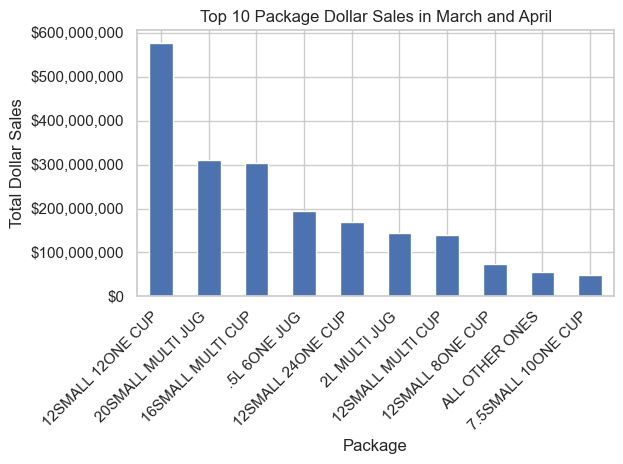

In [48]:
# Make sure the 'PACKAGE' column is of type string
ldata['PACKAGE'] = ldata['PACKAGE'].astype(str)

# Filter the DataFrame for March and April
data_mar_apr = ldata[(ldata['DATE'].dt.month == 3) | (ldata['DATE'].dt.month == 4)]

# Aggregate dollar sales by package, sort, and get the top 5
top_packages_sales = data_mar_apr.groupby('PACKAGE')['DOLLAR_SALES'].sum().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
top_packages_sales.plot(kind='bar', x='PACKAGE', y='DOLLAR_SALES', legend=False)
plt.title('Top 10 Package Dollar Sales in March and April')
plt.xlabel('Package')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(money_format))
plt.tight_layout()
plt.show()

/var/folders/h4/19fhb4x94qd31lwvtlvbr_nc0000gn/T/ipykernel_22419/1590005172.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

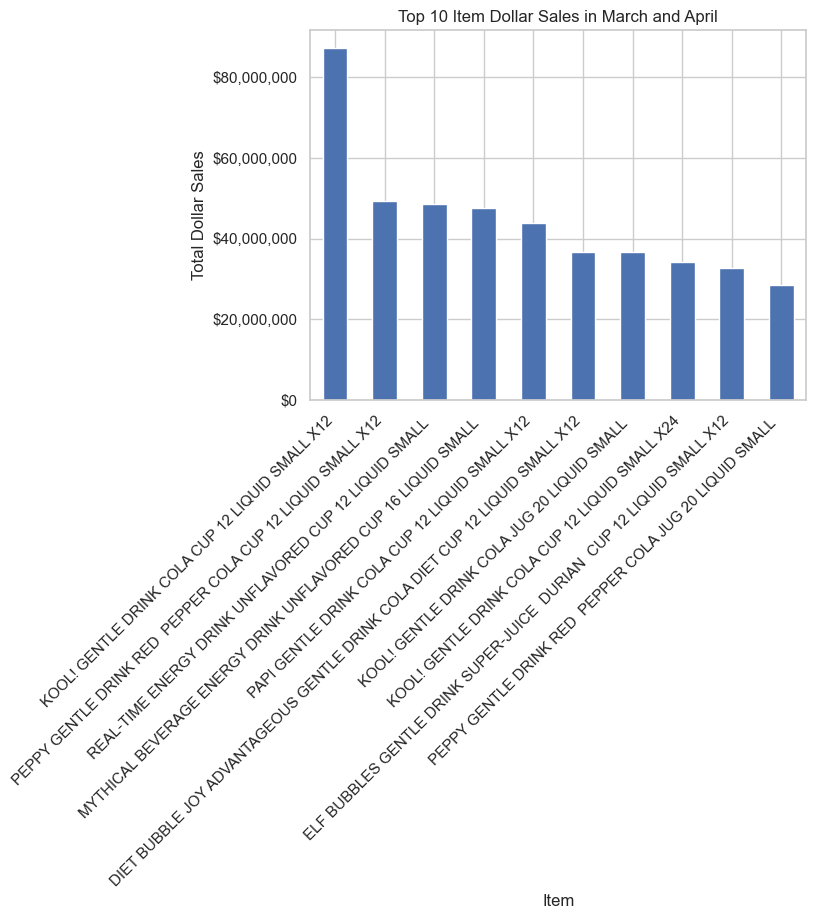

In [50]:
# Ensure the 'ITEM' column is of type string
ldata['ITEM'] = ldata['ITEM'].astype(str)

# Filter the DataFrame for March and April
data_mar_apr = ldata[(ldata['DATE'].dt.month == 3) | (ldata['DATE'].dt.month == 4)]

# Aggregate dollar sales by item, sort them, and get the top 10
top_items_sales = data_mar_apr.groupby('ITEM')['DOLLAR_SALES'].sum().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
top_items_sales.plot(kind='bar', x='ITEM', y='DOLLAR_SALES', legend=False)
plt.title('Top 10 Item Dollar Sales in March and April')
plt.xlabel('Item')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(money_format))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

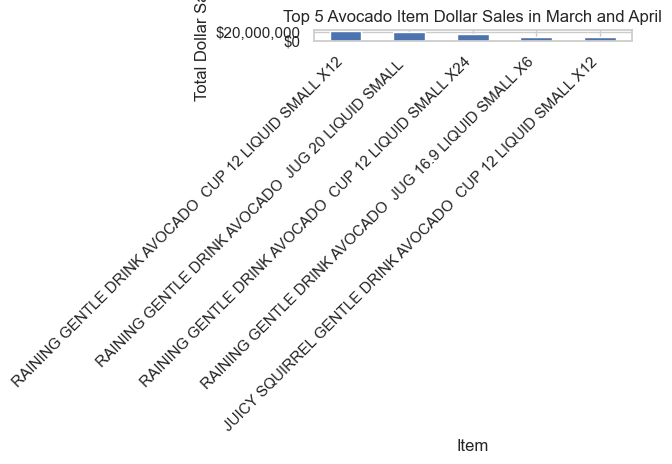

In [51]:
# Filter for items that include 'Avocado' in their description
avocado_items = data_mar_apr[data_mar_apr['ITEM'].str.contains('Avocado', case=False, na=False)]

# Aggregate dollar sales by item, sort them, and get the top 5
top_avocado_items_sales = avocado_items.groupby('ITEM')['DOLLAR_SALES'].sum().nlargest(5).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
top_avocado_items_sales.plot(kind='bar', x='ITEM', y='DOLLAR_SALES', legend=False)
plt.title('Top 5 Avocado Item Dollar Sales in March and April')
plt.xlabel('Item')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(money_format))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

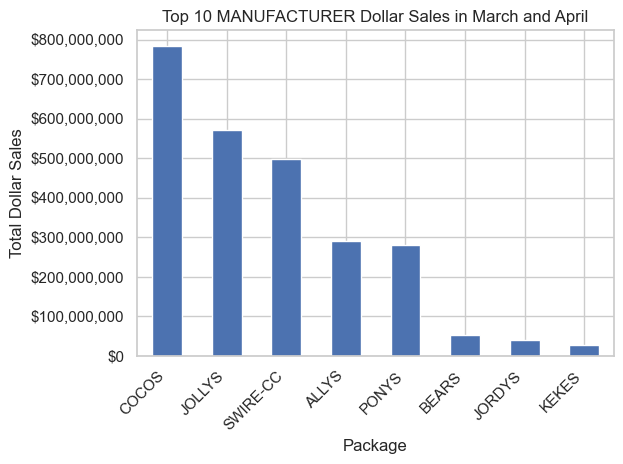

In [52]:
# Make sure the 'MANUFACTURER' column is of type string
ldata['MANUFACTURER'] = ldata['MANUFACTURER'].astype(str)

# Filter the DataFrame for March and April
data_mar_apr = ldata[(ldata['DATE'].dt.month == 3) | (ldata['DATE'].dt.month == 4)]

# Aggregate dollar sales by package, sort, and get the top 5
top_packages_sales = data_mar_apr.groupby('MANUFACTURER')['DOLLAR_SALES'].sum().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
top_packages_sales.plot(kind='bar', x='MANUFACTURER', y='DOLLAR_SALES', legend=False)
plt.title('Top 10 MANUFACTURER Dollar Sales in March and April')
plt.xlabel('Package')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(money_format))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

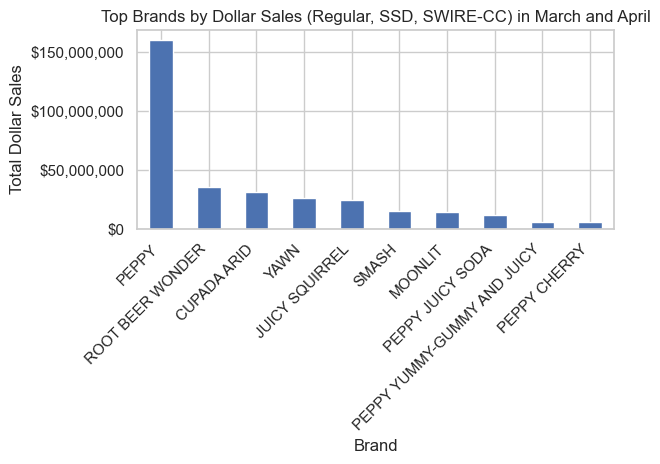

In [54]:
# Filter the data for the specified criteria
filtered_data = ldata[(ldata['CALORIC_SEGMENT'] == 'REGULAR') &
                     (ldata['CATEGORY'] == 'SSD') &
                     (ldata['MANUFACTURER'] == 'SWIRE-CC')]

# Aggregate dollar sales by brand
sales_by_brand = filtered_data.groupby('BRAND')['DOLLAR_SALES'].sum().sort_values(ascending=False).reset_index()

# If you want to consider only March and April
sales_by_brand_mar_apr = filtered_data[(filtered_data['DATE'].dt.month == 3) | (filtered_data['DATE'].dt.month == 4)]
sales_by_brand_mar_apr = sales_by_brand_mar_apr.groupby('BRAND')['DOLLAR_SALES'].sum().sort_values(ascending=False).reset_index()

# Take top N, let's say top 10
top_brands_sales = sales_by_brand_mar_apr.head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = top_brands_sales.plot(kind='bar', x='BRAND', y='DOLLAR_SALES', legend=False)
plt.title('Top Brands by Dollar Sales (Regular, SSD, SWIRE-CC) in March and April')
plt.xlabel('Brand')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(FuncFormatter(money_format))
plt.tight_layout()
plt.show()